# K-means Clustering

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 1. Import Packages and load Dataset

### 1) Import Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [42]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

### 2) Load Dataset
- Load iris Dataset

In [4]:
iris = load_iris()

- iris: Dictionary
  - X:iris.data
  - y:iris.target

In [5]:
iris

# data에 X만 array로
# target에 y만 array로

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

- pandas DataFrame

In [6]:
DF = pd.DataFrame(data = iris.data,
                  columns = ['sepal_length' ,
                             'sepal_width' ,
                             'petal_length' ,
                             'petal_width'])

In [7]:
DF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2. K-means Clustering

### 1) Modeling
- n_clusters: 군집 개수 지정
- init: 초기 중심 설정 방식(기본값)
- max_iter: 최대 반복 횟수

In [9]:
kmeans_3 = KMeans(n_clusters = 3,       # 몇개로 묶어야 하는지 사실 모른다
                  init = 'k-means++',
                  max_iter = 15,
                  random_state = 2045)

kmeans_3.fit(DF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=15,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2045, tol=0.0001, verbose=0)

### 2) Clustering Result
- 반복횟수

In [10]:
kmeans_3.n_iter_

3

- 군집별 중심점

In [11]:
kmeans_3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

- 군집결과 레이블

In [12]:
kmeans_3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

- 군집 중심까지의 제곱 거리의 합
  - 이론상으로는 계속 작아진다
  - K의 숫자를 늘리면, 거리제곱이 합은 계속 작아지게 된다
  - 이것을 보여주는 것이 Scree Plot

In [13]:
kmeans_3.inertia_

78.85144142614601

## 3. Scree Plot

### 1) DataFrame

In [14]:
Z = pd.DataFrame(data = iris.data,
                 columns = ['sepal_length' ,
                            'sepal_width' ,
                            'petal_length' ,
                            'petal_width'])

Z.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 2) K(1~9) 군집분석

In [19]:
inertia = []
K = range(1, 10)

for k in K:
  kmeansModel = KMeans(n_clusters = k)
  kmeansModel.fit(Z)
  inertia.append(kmeansModel.inertia_)

### 3) 군집 중심까지의 제곱 거리의 합

In [20]:
inertia

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.299712121212124,
 29.98894395078606,
 27.861741540115112]

### 4) Plot the elbow

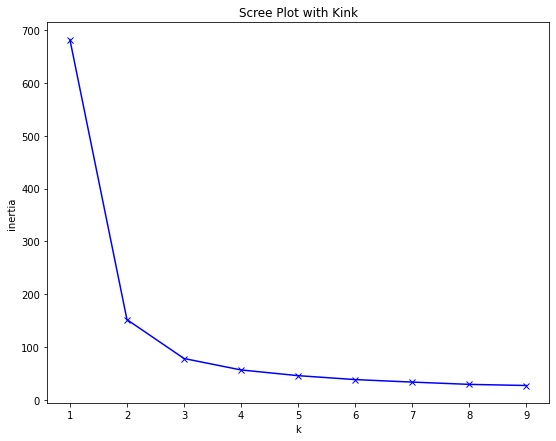

In [21]:
plt.figure(figsize = (9, 7))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Scree Plot with Kink')
plt.show()

# 거리 제곱의 합은 계속 줄어든다
# 그룹 내 동질성은 높아지지만, 그룹 간 동질성도 점점 커진다
# 그룹 간은 차이점이 있어야하는데...

# 급격하게 완만해지는 지점
# 시각적으로 보는 것이 한계가 있으므로 정량적으로 측정하는 방법을 사용
# 실루엣 계수: 0~1 사이 값으로 측정

## 4. Visualization with PCA(Principal Component Analysis)
- 시각화하고 싶으나 4차원의 정보이므로 2차원으로 축소시켜야 시각화 가능

### 1) target 및 cluster 추가

In [22]:
DF['cluster'] = kmeans_3.labels_
DF['target'] = iris.target # 원래 비지도학습이지만, 답을 확인하기 위해 추가

In [23]:
DF.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


### 2) 군집 결과 확인

In [24]:
DF.groupby('target')['cluster'].value_counts()

# 원래 못하는 것(비지도학습이므로)

target  cluster
0       1          50
1       0          48
        2           2
2       2          36
        0          14
Name: cluster, dtype: int64

### 3) PCA 차원 축소(4차원 -> 2차원)

In [26]:
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

### 4) pca_x 와 pca_y 추가

In [27]:
DF['pca_x'] = pca_transformed[: , 0]
DF['pca_y'] = pca_transformed[: , 1]

In [28]:
DF.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


### 5) 2차원 시각화
- 군집 값 0, 1, 2 인덱스 추출

In [29]:
idx_0 = DF[DF['cluster'] == 0].index
idx_1 = DF[DF['cluster'] == 1].index
idx_2 = DF[DF['cluster'] == 2].index

In [30]:
idx_0 , idx_1 , idx_2

(Int64Index([ 50,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
              64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
              78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
              91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 106, 113, 114,
             119, 121, 123, 126, 127, 133, 138, 142, 146, 149],
            dtype='int64'),
 Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64'),
 Int64Index([ 52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112,
             115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132,
             134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148],
            dtype='int64'))

- 0, 1, 2 인덱스 시각화

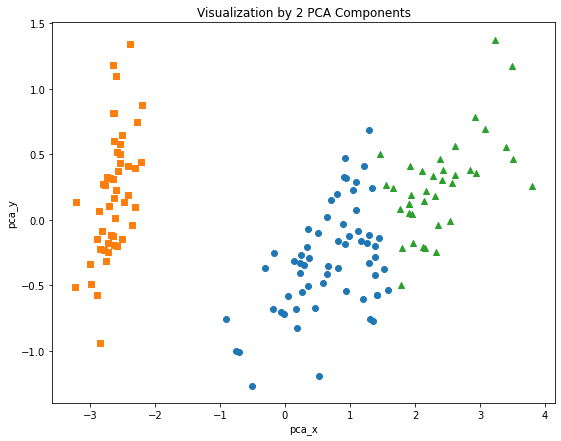

In [31]:
plt.figure(figsize = (9, 7))
plt.scatter(x = DF.loc[idx_0 , 'pca_x'],
            y = DF.loc[idx_0 , 'pca_y'],
            marker = 'o')
plt.scatter(x = DF.loc[idx_1 , 'pca_x'],
            y = DF.loc[idx_1 , 'pca_y'],
            marker = 's')
plt.scatter(x = DF.loc[idx_2 , 'pca_x'],
            y = DF.loc[idx_2 , 'pca_y'],
            marker = '^')

plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.title('Visualization by 2 PCA Components')
plt.show()

## 5. Silhouette Analysis

- 실루엣 계수(Silhouette Coefficient) 측정 지표
  - 개별 데이터포인트가 가지는 군집화 지표
  - 데이터포인트가 같은 군집 내의 다른 데이터포인트와 얼마나 가깝게 군집되어 있고
  - 다른 군집에 있는 데이터포인트와 얼마나 멀게 분리되어 있는지 나타내는 지표

- 각 군집 간의 거리가 얼마나 효율적으로 분리되었는지 평가
  - 다른 군집과의 거리는 멀고, 군집 내 데이터포인트 간의 거리는 가깝게 형성

### 1) 3개로 군집분석한 결과 사용 ('cluster')

In [36]:
DF.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


### 2) 실루엣 계수값

- 개별 데이터포인트들의 실루엣 계수값 계산
  - 'cluster' 정보 사용

- 실루엣 계수는 -1 ~ 1 사이의 값을 가짐
  - 1에 가까울수록 근접한 다른 군집과 거리가 멀리 떨어져있음을 의미
  - 0에 가까울수록 근접한 다른 군집과 거리가 가까운 것을 의미
  - -1 값은 전혀 다른 군집에 데이터포인트가 할당되었음을 의미

- silhouette_samples()

In [35]:
DF.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


In [38]:
silhouette_samples(iris.data, DF['cluster'])

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ,
       0.80310303, 0.83591262, 0.81056389, 0.74615046, 0.70259371,
       0.64377156, 0.77568391, 0.85101831, 0.70685782, 0.82030124,
       0.78418399, 0.82590584, 0.79297218, 0.7941134 , 0.77503635,
       0.79865509, 0.83346695, 0.84201773, 0.84364429, 0.81784646,
       0.81518962, 0.79899235, 0.76272528, 0.72224615, 0.82877171,
       0.83224831, 0.79415322, 0.84188954, 0.76856774, 0.85033231,
       0.84941579, 0.63900017, 0.78657771, 0.80023815, 0.74698726,
       0.80977534, 0.81340268, 0.81902059, 0.8182324 , 0.85209835,
       0.02672203, 0.38118643, 0.05340075, 0.59294381, 0.36885321,
       0.59221025, 0.28232583, 0.26525405, 0.34419223, 0.57829491,
       0.37478707, 0.58710354, 0.55107857, 0.48216686, 0.56310057,
       0.32459291, 0.55751057, 0.61072967, 0.46149897, 0.6115753 ,
       0.32909528, 0.58968904, 0.31046301, 0.49424779, 0.50004

- 데이터포인트 별 실루엣 계수값 추가

In [39]:
DF['silh_coef'] = silhouette_samples(iris.data, DF['cluster'])

In [40]:
DF.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y,silh_coef
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397,0.852955
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001,0.815495
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949,0.829315
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299,0.805014
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755,0.849302


### 3) 실루엣 점수(Silhouette Score)

- 데이터포인트들의 실루엣 계수값의 평균
- 권장 실루엣 점수값
  - 전체 실루엣 계수 평균이 0~1 사이의 값을 가지며, 1에 가까운 경우
  - 개별 군집의 실루엣 계수 평균들이 전체 실루엣 계수 평균과 크게 차이나지 않는 경우


- silhouette_score()

In [43]:
silhouette_score(iris.data, DF['cluster'])

0.5528190123564091

- 3개 군집의 실루엣 점수와 전체 실루엣 점수 비교

In [44]:
DF.groupby('cluster')['silh_coef'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silh_coef, dtype: float64